0it [00:00, ?it/s]

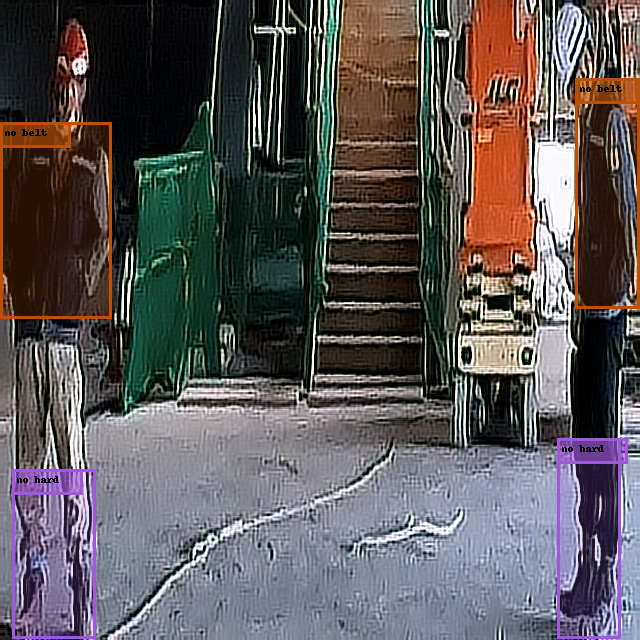

1it [00:00,  6.24it/s]

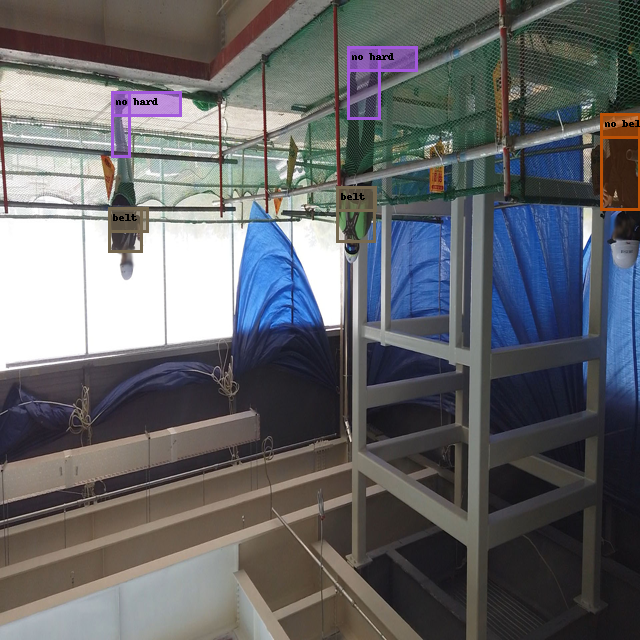

2it [00:00,  5.39it/s]

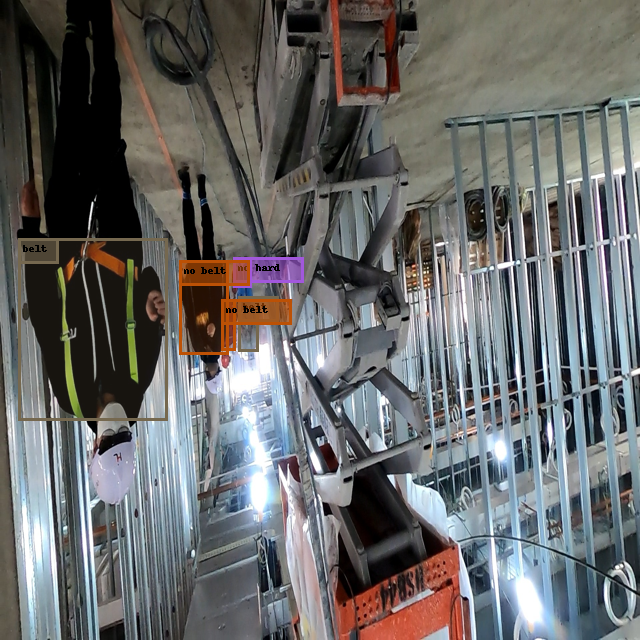

2it [00:01,  1.22it/s]


In [1]:
# bounding boxÍ∞Ä Ïûò ÌòïÏÑ± ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Î∂ÄÎ∂Ñ
import random
import numpy as np
import os
import shutil
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
from PIL import Image, ImageDraw, ImageFont, ImageOps
from tqdm import tqdm
import PIL.ImageOps

dir_main = "./yolov5"
filenames_image = glob(f"{dir_main}/datasets/images/train/*.png")
filenames_label = [filename.replace('images', 'labels').replace('png', 'txt') for filename in filenames_image]
classes = ["belt", "no belt", "hard", "no hard", "helmet", "no helmett"]

color = []
# color ÏÉùÏÑ±ÌïòÎäî Î∂ÄÎ∂Ñ
for _ in range(6):
    c = list(np.random.choice(range(256), size=3)) + [255]
    c = tuple(c)
    color.append(c)

# annotation Ï†ïÎ≥¥Í∞Ä Ï†úÎåÄÎ°ú Ï†ÄÏû•ÎêêÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú bounding boxÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò
def draw_bbox(draw, bbox, label, color=(0, 255, 0, 255), confs=None, size=15):
    font = ImageFont.load_default()
    # font = ImageFont.truetype("arial", size=size)
    draw.rectangle(bbox, outline=color, width =3)
    def set_alpha(color, value):
        background = list(color)
        background[3] = value
        return tuple(background)
    background = set_alpha(color, 50)
    draw.rectangle(bbox, outline=color, fill=background, width =3)
    background = set_alpha(color, 150)
    text = f"{label}" + ("" if confs==None else f":{conf:0.4}")
    text_bbox = bbox[0], bbox[1], bbox[0]+len(text)*10, bbox[1]+25
    draw.rectangle(text_bbox, outline=color, fill=background, width =3)
    draw.text((bbox[0]+5, bbox[1]+5), text, (0,0,0), font=font)

cnt = 3

for filename_image, filename_label in tqdm(zip(filenames_image, filenames_label)):
    img = Image.open(filename_image)
    img = img.resize((640, 640))
    width, height = img.size
    draw = ImageDraw.Draw(img, 'RGBA')
    with open(filename_label, 'r') as f:
        labels = f.readlines()
        # strip: Í∞úÌñâ Î¨∏Ïûê Ï†úÍ±∞.
        labels = list(map(lambda s: s.strip().split(), labels))
    # bounding boxÎ•º Í∑∏Î¶¨Îäî Î∂ÄÎ∂Ñ
    for label in labels:
        # classÎäî 0Î∂ÄÌÑ∞ ÏãúÏûë!
        cls = int(label[0])
        x, y, w, h = map(float, label[1:])
        x1, x2 = width * (x-w/2), width * (x+w/2)
        y1, y2 = height * (y-h/2), height * (y+h/2)
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        draw_bbox(draw, bbox=(x1, y1, x2, y2), label=classes[cls], color=color[cls], size=15)
    img.show()

    cnt -= 1
    if cnt ==0:
        break

In [2]:
# check label_file
# datasetÏùÄ augmentation Ï†ÅÏö© Ï†ÑÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌååÏùº
# dataset2ÏùÄ Augmentation Ï†ÅÏö© ÌõÑÏùò ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌååÏùº
import os
files1 = "./yolov5/dataset/labels/train"
under1 = os.listdir(files1)
file1 = [os.path.join(files1, u) for u in under1]
files2 = "./yolov5/dataset2/labels/train"
under2 = os.listdir(files2)
file2 = [os.path.join(files2, u) for u in under2]
def check_files(F):
    belt, nobelt, hard, nohard, helmet, nohelmet = 0, 0, 0, 0, 0, 0
    for f in tqdm(F):
        with open(f, "r", encoding = "utf-8") as t:
            data = t.readlines()
        for d in data:
            if d[0] == '0':
                belt += 1
            if d[0] == "1":
                nobelt += 1
            if d[0] == "2":
                hard += 1
            if d[0] == "3":
                nohard += 1
            if d[0] == "4":
                helmet += 1
            if d[0] == '5':
                nohelmet += 1
    return belt, nobelt, hard, nohard, helmet, nohelmet
classes1 = check_files(file1)
classes2 = check_files(file2)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6511/6511 [00:15<00:00, 433.76it/s] 


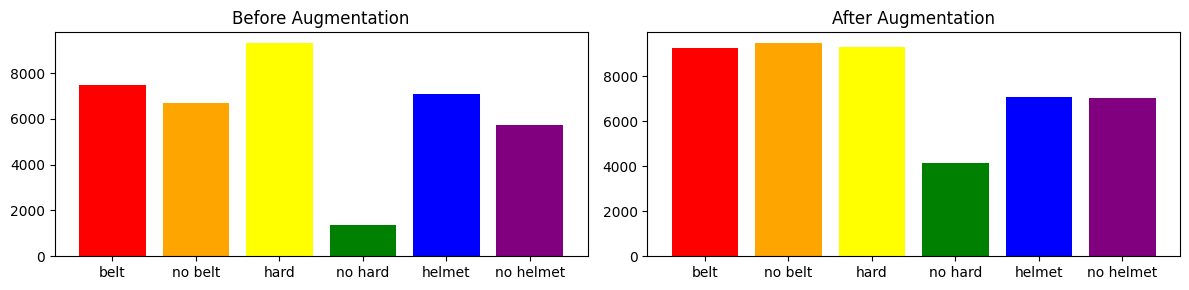

In [3]:
plt.figure(figsize = (12, 3))
classname = ["belt", "no belt", "hard", "no hard", "helmet", "no helmet"]
colors = ["red", "orange", "yellow", "green", "blue", "purple"]
plt.subplot(1,2,1)
plt.title("Before Augmentation")
bar1 = plt.bar(classname, classes1, color = colors)
# plt.legend(bar1, classname, loc = "upper right")
plt.subplot(1, 2, 2)
plt.title("After Augmentation")
bar2 = plt.bar(classname, classes2, color = colors)
# plt.legend(bar2, classname)
plt.tight_layout()
plt.savefig("/mnt/workspace/MyCanvas/yolov5/number_of_cls.png")

### Train Î∂ÄÎ∂Ñ
Parsing Î∂ÄÎ∂Ñ
- -- img: image size ÏßÄÏ†ï(640ÏúºÎ°ú Resize)
- -- batch-size: batch_size 
- -- epochs: epoch Ïàò
- -- data: yaml ÌååÏùº(train, validation, number of classes, classÏùò Ïù¥Î¶Ñ ÏßÄÏ†ïÎêú ÌååÏùº)
- -- hyp: hyperparameter ÏßÄÏ†ï(yaml ÌòïÏãù) / Ï¢ÖÎ•òÎäî scratch-low, med, highÎ°ú Í∞ÅÍ∞Å learning rateÏùò ÎÜíÏùÄ Ï†ïÎèÑÏóê Îî∞Îùº Îã§Î•¥Îã§. ‚Äª Ï∞∏Í≥†ÏÇ¨Ìï≠: f1_gammaÎäî defaultÎ°úÎäî 0Ïù¥Îã§. class imbalanceÏùò Î¨∏Ï†úÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ hyperparameter yaml ÌååÏùºÏóêÏÑú f1_gamma Î∂ÄÎ∂ÑÏùÑ 0Î≥¥Îã§ ÌÅ∞ ÏàòÎ°ú ÏßÄÏ†ïÌïòÎ©¥ focal lossÎ•º Î∞îÌÉïÏúºÎ°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïúÎã§.
- -- optimizer: defaultÎ°úÎäî SGDÏù¥Î©∞ Adam, AdamWÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•ÌïòÎã§.
- -- device: ÌôòÍ≤ΩÏóê ÎßûÎäî device ÏßÄÏ†ï.(defaultÎäî cpu, 0, 1, 2, 3ÏùÑ ÌÜµÌï¥ cuda ÌôúÏö©)
- -- weights: Í∞ÄÏ§ëÏπò Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÌååÏùº ÏßÄÏ†ï.

In [ ]:
!python3 train.py --data /mnt/workspace/MyCanvas/yolov5/cfg.yaml --weights /mnt/workspace/MyCanvas/yolov5/best.pt --batch 16 --device 0 --workers 0 --optimizer 'AdamW' --img 640 --cos-lr --hyp /mnt/workspace/MyCanvas/yolov5/data/hyps/hyp.scratch-low.yaml --epochs 100 --patience 30 --label-smoothing 0.1 

### Validation Î∂ÄÎ∂Ñ
Parsing
- --data : cfg.yamlÏóê valid Ïù¥ÎØ∏ÏßÄ ÌååÏùº Í≤ΩÎ°úÎ•º Î∂àÎü¨Ïò®Îã§
- --weights: Í∞ÄÏ§ëÏπò Ï†ÄÏû• Í≤ΩÎ°úÎ•º ÏßÄÏ†ï
- --device: gpu or cpu
- --verbose: Í≤∞Í≥ºÏπòÎ•º printÌïòÎäî Í≤ÉÏùò Ïó¨Î∂Ä

In [6]:
!python val.py --data /mnt/workspace/MyCanvas/yolov5/cfg.yaml --weights /mnt/workspace/MyCanvas/yolov5/runs/train/exp4/weights/best.pt --device 'cpu' --verbose --workers 0

val: data=/mnt/workspace/MyCanvas/yolov5/cfg.yaml, weights=['/mnt/workspace/MyCanvas/yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=cpu, workers=0, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-231-gc2f131a Python-3.8.13 torch-1.10.1 CPU

Fusing layers... 
Model summary: 267 layers, 46135203 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /mnt/workspace/MyCanvas/yolov5/final_data_/labels/valid.cache... 1
                 Class     Images  Instances          P          R      mAP50   
                   all       1193      10655      0.586      0.711      0.662      0.321
                  Belt       1193       2753       0.82      0.793      0.837      0.394
               No Belt       1193       1439      0.424      0.791      0.657      0.315
   

In [7]:
!python val.py --data /mnt/workspace/MyCanvas/yolov5/cfg.yaml --weights /mnt/workspace/MyCanvas/yolov5/runs/train/exp9/weights/best.pt --device 'cpu' --verbose --workers 0

val: data=/mnt/workspace/MyCanvas/yolov5/cfg.yaml, weights=['/mnt/workspace/MyCanvas/yolov5/runs/train/exp9/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=cpu, workers=0, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-231-gc2f131a Python-3.8.13 torch-1.10.1 CPU

Fusing layers... 
Model summary: 267 layers, 46135203 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /mnt/workspace/MyCanvas/yolov5/final_data_/labels/valid.cache... 1
                 Class     Images  Instances          P          R      mAP50   
                   all       1193      10655      0.721      0.694      0.735      0.428
                  Belt       1193       2753      0.822      0.885       0.87       0.44
               No Belt       1193       1439      0.695      0.688      0.746       0.39
   

In [8]:
!python val.py --data /mnt/workspace/MyCanvas/yolov5/cfg.yaml --weights /mnt/workspace/MyCanvas/yolov5/runs/train/exp11/weights/best.pt --device 'cpu' --verbose --workers 0

val: data=/mnt/workspace/MyCanvas/yolov5/cfg.yaml, weights=['/mnt/workspace/MyCanvas/yolov5/runs/train/exp11/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=cpu, workers=0, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-231-gc2f131a Python-3.8.13 torch-1.10.1 CPU

Fusing layers... 
Model summary: 267 layers, 46135203 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /mnt/workspace/MyCanvas/yolov5/final_data_/labels/valid.cache... 1
                 Class     Images  Instances          P          R      mAP50   
                   all       1193      10655       0.73      0.733      0.761      0.449
                  Belt       1193       2753      0.806      0.912      0.875      0.453
               No Belt       1193       1439      0.695       0.68      0.748        0.4
  

### detection
- --source: ÏûÑÏùòÏùò ÌÉêÏßÄÌïòÍ≥†Ïûê ÌïòÎäî Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°ú
- --weights: checkpoint fileÏùò Í≤ΩÎ°ú
- --device: gpu or cpu

In [ ]:
!python detect.py --source ./yolov5/sample --weights ./yolov5/runs/train/exp4/weights/best.pt --device "0"